In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, confusion_matrix, f1_score, precision_score, recall_score 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
import time

In [2]:
start_time = time.time()

In [3]:
tensorflow.random.set_seed(1234)

In [4]:
DATASET_PATH = './dataset/processed_dataset/'
TENSORFLOW_SAVED_MODEL_PATH = './tensorflow_saved_models/'
IMAGE_PATH = './images/'

In [5]:
datasets = pd.concat([pd.read_csv(file) for file in glob.glob(DATASET_PATH + '*')])

In [6]:
datasets.head()

,50.0,71.75421209117937,93.50842418235877,115.26263627353815,137.01684836471753,158.7710604558969,180.52527254707638,202.2794846382557,224.0336967294351,245.78790882061452,...,21825.966303270565,21847.720515361747,21869.474727452925,21891.228939544104,21912.983151635282,21934.737363726465,21956.491575817643,21978.245787908818,22000.0,class
0,0.000801,0.001457,0.002129,0.002763,0.003370,0.003945,0.004515,0.005036,0.005538,0.005981,...,0.008532,0.008513,0.008491,0.008484,0.008457,0.008454,0.008432,0.008421,0.008423,nc1_ncn5121_no4
1,0.000827,0.001476,0.002096,0.002775,0.003362,0.003950,0.004512,0.005057,0.005534,0.005997,...,0.008506,0.008514,0.008490,0.008488,0.008481,0.008448,0.008445,0.008432,0.008418,nc1_ncn5121_no4
2,0.000770,0.001462,0.002094,0.002737,0.003353,0.003949,0.004500,0.005031,0.005541,0.005990,...,0.008520,0.008506,0.008494,0.008479,0.008482,0.008457,0.008447,0.008437,0.008416,nc1_ncn5121_no4
3,0.000819,0.001452,0.002100,0.002755,0.003370,0.003962,0.004510,0.005017,0.005528,0.005978,...,0.008524,0.008516,0.008474,0.008483,0.008479,0.008464,0.008442,0.008435,0.008425,nc1_ncn5121_no4
4,0.000884,0.001472,0.002113,0.002735,0.003354,0.003940,0.004498,0.005016,0.005539,0.005994,...,0.008494,0.008499,0.008505,0.008468,0.008469,0.008445,0.008433,0.008433,0.008388,nc1_ncn5121_no4


In [7]:
X = datasets.iloc[:, 0:1010]
y = datasets['class']

In [8]:
print(f'Dataset size: {len(X)}')

Dataset size: 5000


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, train_size=0.70)

X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

y_train = list(y_train)
y_test = list(y_test)

input_shape = X_train[0].shape

In [10]:
print(f'Training dataset size: {len(X_train)}')
print(f'Test dataset size: {len(X_test)}')

Training dataset size: 3500
Test dataset size: 1500


In [11]:
NUMBER_OF_CLASSES = 10

In [12]:
class_mapping = {'nc1_ncn5121_no4': 0, 'nc1_ncn5121_no5': 1, 'nc1_switch_sl2': 2, 'nc1_switch_dem': 3, 'nc1_nodevice': 4,
                 'nc2_ncn5121_no4': 5, 'nc2_ncn5121_no5': 6, 'nc2_switch_sl2': 7, 'nc2_switch_dem': 8, 'nc2_nodevice': 9,}

In [13]:
classes = ['nc1_ncn5121_no4', 'nc1_ncn5121_no5', 'nc1_switch_sl2', 'nc1_switch_dem', 'nc1_nodevice', 'nc2_ncn5121_no4', 'nc2_ncn5121_no5', 'nc2_switch_sl2', 'nc2_switch_dem', 'nc2_nodevice']

In [14]:
y_train = np.array([class_mapping[label] for label in y_train])
y_test = np.array([class_mapping[label] for label in y_test])

In [15]:
y_train = to_categorical(y_train, NUMBER_OF_CLASSES).astype('int32')
y_test = to_categorical(y_test, NUMBER_OF_CLASSES).astype('int32')

In [16]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [17]:
def MLPClassifier():
    model = Sequential()
    model.add(Dense(100, input_shape=input_shape, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(NUMBER_OF_CLASSES, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        
    return model

In [18]:
mlp = MLPClassifier()
mlp.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               101100    
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                510       
Total params: 106,660
Trainable params: 106,660
Non-trainable params: 0
_________________________________________________________________


In [19]:
history_mlp = mlp.fit(X_train, y_train, epochs=250, verbose=2, validation_split=0.2)

Epoch 1/250
88/88 - 1s - loss: 1.1410 - accuracy: 0.5404 - val_loss: 0.4850 - val_accuracy: 0.7343
Epoch 2/250
88/88 - 0s - loss: 0.5616 - accuracy: 0.7336 - val_loss: 0.3147 - val_accuracy: 0.8486
Epoch 3/250
88/88 - 0s - loss: 0.4458 - accuracy: 0.7668 - val_loss: 0.3093 - val_accuracy: 0.8571
Epoch 4/250
88/88 - 0s - loss: 0.3682 - accuracy: 0.8093 - val_loss: 0.3163 - val_accuracy: 0.8029
Epoch 5/250
88/88 - 0s - loss: 0.3514 - accuracy: 0.8139 - val_loss: 0.2887 - val_accuracy: 0.8786
Epoch 6/250
88/88 - 0s - loss: 0.3358 - accuracy: 0.8425 - val_loss: 0.2660 - val_accuracy: 0.8829
Epoch 7/250
88/88 - 0s - loss: 0.3045 - accuracy: 0.8464 - val_loss: 0.2138 - val_accuracy: 0.8986
Epoch 8/250
88/88 - 0s - loss: 0.2809 - accuracy: 0.8579 - val_loss: 0.2370 - val_accuracy: 0.9014
Epoch 9/250
88/88 - 0s - loss: 0.2829 - accuracy: 0.8711 - val_loss: 0.1918 - val_accuracy: 0.9600
Epoch 10/250
88/88 - 0s - loss: 0.2357 - accuracy: 0.8964 - val_loss: 0.1584 - val_accuracy: 0.9543
Epoch 11/

88/88 - 0s - loss: 0.0653 - accuracy: 0.9779 - val_loss: 0.0365 - val_accuracy: 0.9929
Epoch 84/250
88/88 - 0s - loss: 0.0703 - accuracy: 0.9725 - val_loss: 0.0329 - val_accuracy: 0.9943
Epoch 85/250
88/88 - 0s - loss: 0.0617 - accuracy: 0.9768 - val_loss: 0.0307 - val_accuracy: 0.9929
Epoch 86/250
88/88 - 0s - loss: 0.0796 - accuracy: 0.9668 - val_loss: 0.0312 - val_accuracy: 0.9943
Epoch 87/250
88/88 - 0s - loss: 0.0704 - accuracy: 0.9736 - val_loss: 0.0278 - val_accuracy: 0.9929
Epoch 88/250
88/88 - 0s - loss: 0.1236 - accuracy: 0.9557 - val_loss: 0.0745 - val_accuracy: 0.9671
Epoch 89/250
88/88 - 0s - loss: 0.1162 - accuracy: 0.9554 - val_loss: 0.0614 - val_accuracy: 0.9743
Epoch 90/250
88/88 - 0s - loss: 0.0835 - accuracy: 0.9675 - val_loss: 0.0435 - val_accuracy: 0.9943
Epoch 91/250
88/88 - 0s - loss: 0.0815 - accuracy: 0.9707 - val_loss: 0.0758 - val_accuracy: 0.9614
Epoch 92/250
88/88 - 0s - loss: 0.0751 - accuracy: 0.9721 - val_loss: 0.0404 - val_accuracy: 0.9943
Epoch 93/250


Epoch 165/250
88/88 - 0s - loss: 0.0663 - accuracy: 0.9718 - val_loss: 0.0454 - val_accuracy: 0.9743
Epoch 166/250
88/88 - 0s - loss: 0.0851 - accuracy: 0.9661 - val_loss: 0.0375 - val_accuracy: 0.9829
Epoch 167/250
88/88 - 0s - loss: 0.0710 - accuracy: 0.9736 - val_loss: 0.0417 - val_accuracy: 0.9929
Epoch 168/250
88/88 - 0s - loss: 0.0599 - accuracy: 0.9757 - val_loss: 0.0349 - val_accuracy: 0.9943
Epoch 169/250
88/88 - 0s - loss: 0.0634 - accuracy: 0.9771 - val_loss: 0.0411 - val_accuracy: 0.9900
Epoch 170/250
88/88 - 0s - loss: 0.0824 - accuracy: 0.9729 - val_loss: 0.0550 - val_accuracy: 0.9871
Epoch 171/250
88/88 - 0s - loss: 0.0784 - accuracy: 0.9718 - val_loss: 0.0358 - val_accuracy: 0.9914
Epoch 172/250
88/88 - 0s - loss: 0.0790 - accuracy: 0.9789 - val_loss: 0.0323 - val_accuracy: 0.9929
Epoch 173/250
88/88 - 0s - loss: 0.0591 - accuracy: 0.9796 - val_loss: 0.0518 - val_accuracy: 0.9900
Epoch 174/250
88/88 - 0s - loss: 0.0963 - accuracy: 0.9679 - val_loss: 0.0246 - val_accurac

88/88 - 0s - loss: 0.0597 - accuracy: 0.9793 - val_loss: 0.0405 - val_accuracy: 0.9929
Epoch 247/250
88/88 - 0s - loss: 0.0638 - accuracy: 0.9768 - val_loss: 0.0295 - val_accuracy: 0.9886
Epoch 248/250
88/88 - 0s - loss: 0.0769 - accuracy: 0.9736 - val_loss: 0.0308 - val_accuracy: 0.9929
Epoch 249/250
88/88 - 0s - loss: 0.0534 - accuracy: 0.9811 - val_loss: 0.0368 - val_accuracy: 0.9900
Epoch 250/250
88/88 - 0s - loss: 0.0457 - accuracy: 0.9836 - val_loss: 0.0182 - val_accuracy: 0.9957


In [20]:
def get_report(model):
    pred = model.predict(X_test)
    predictions = (pred > 0.5).astype("int32")
    print(classification_report(y_test, predictions, target_names=classes))
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions,  average='macro')
    recall = recall_score(y_test, predictions, average='macro')
    f1 = f1_score(y_test, predictions, average='macro')
    
    return accuracy, precision, recall, f1, predictions

In [21]:
mlp_score = get_report(mlp)
predictions = mlp_score[4]
print(f'Accuracy: {mlp_score[0]}')
print(f'Precision: {mlp_score[1]}')
print(f'Recall: {mlp_score[2]}')
print(f'F1-Score: {mlp_score[3]}')

                 precision    recall  f1-score   support

nc1_ncn5121_no4       1.00      1.00      1.00       150
nc1_ncn5121_no5       1.00      1.00      1.00       150
 nc1_switch_sl2       1.00      1.00      1.00       150
 nc1_switch_dem       1.00      1.00      1.00       150
   nc1_nodevice       1.00      1.00      1.00       150
nc2_ncn5121_no4       1.00      1.00      1.00       150
nc2_ncn5121_no5       1.00      1.00      1.00       150
 nc2_switch_sl2       0.98      1.00      0.99       150
 nc2_switch_dem       1.00      0.98      0.99       150
   nc2_nodevice       1.00      1.00      1.00       150

      micro avg       1.00      1.00      1.00      1500
      macro avg       1.00      1.00      1.00      1500
   weighted avg       1.00      1.00      1.00      1500
    samples avg       1.00      1.00      1.00      1500

Accuracy: 0.998
Precision: 0.9980392156862745
Recall: 0.998
F1-Score: 0.9979997999799981


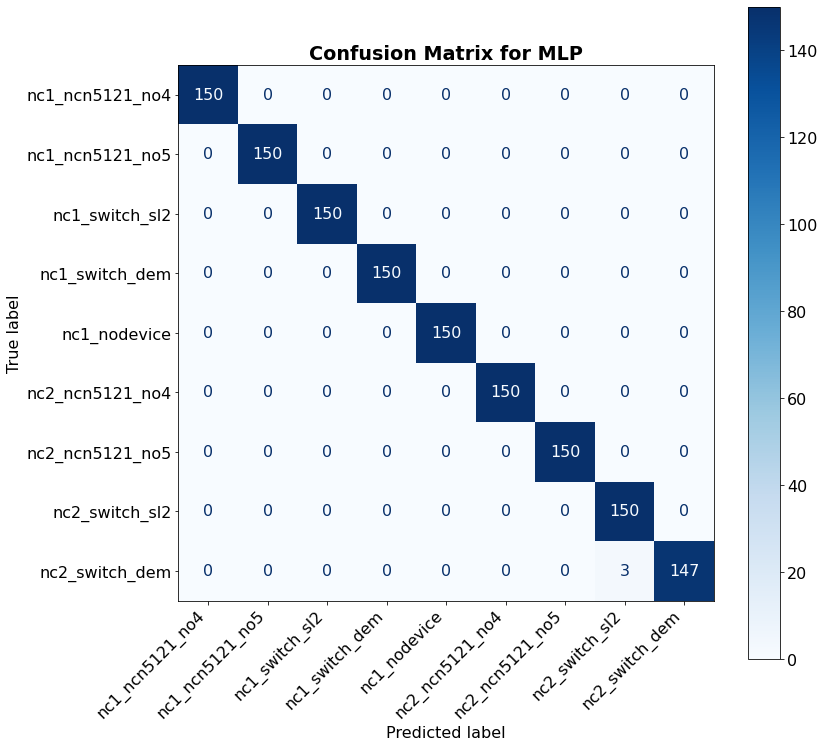

In [22]:
plt.rcParams.update({'font.size': 16})

fig = plt.figure(figsize=(12, 12))
fig.tight_layout()
ax = fig.add_subplot(111)
plt.title('Confusion Matrix for MLP', fontweight='bold')

cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(predictions, axis=1), labels=range(9))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)

disp.plot(ax=ax, cmap='Blues', values_format='')
plt.xticks(rotation=45, ha='right')

plt.savefig(IMAGE_PATH + 'mlp_confusion_matrix.pdf', bbox_inches='tight')

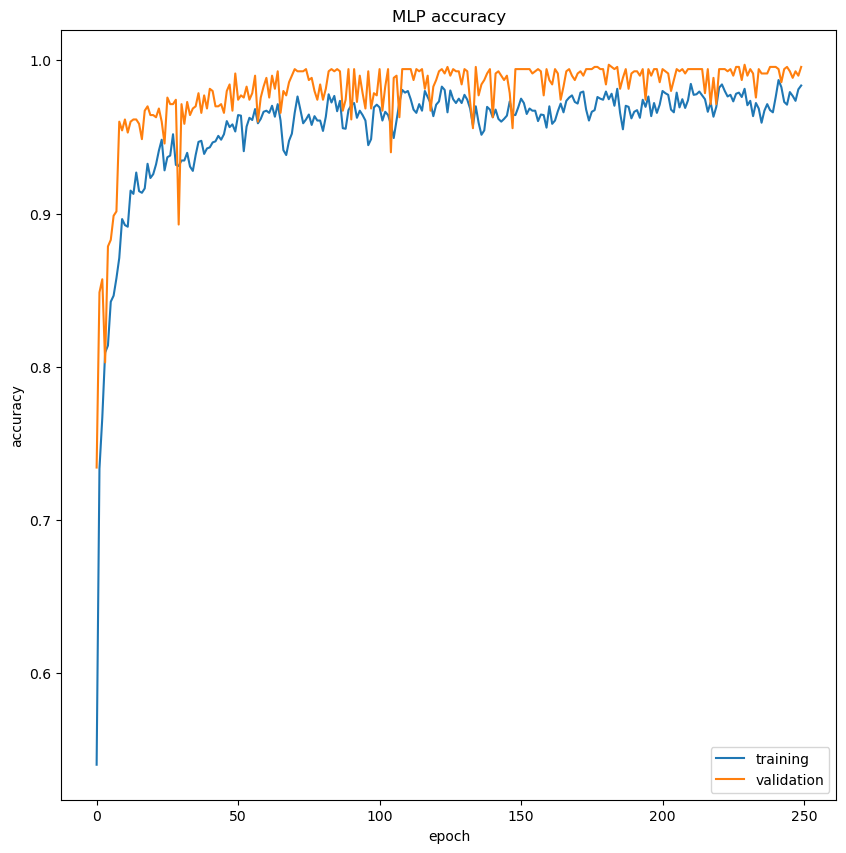

In [23]:
plt.rcdefaults()
fig = plt.figure(figsize=(10, 10))

plt.plot(history_mlp.history['accuracy'])
plt.plot(history_mlp.history['val_accuracy'])
plt.title('MLP accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='lower right')

plt.savefig(IMAGE_PATH + 'mlp_accuracy.pdf', bbox_inches='tight')

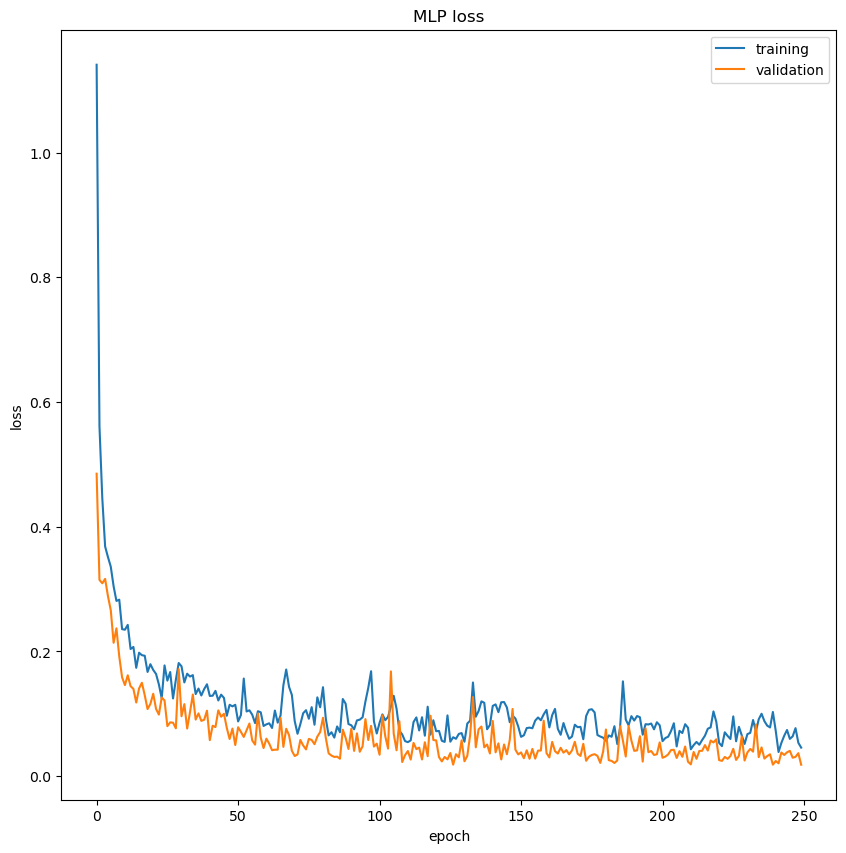

In [24]:
fig = plt.figure(figsize=(10, 10))

plt.plot(history_mlp.history['loss'])
plt.plot(history_mlp.history['val_loss'])
plt.title('MLP loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper right')

plt.savefig(IMAGE_PATH + 'mlp_loss.pdf', bbox_inches='tight')

# Save TensorFlow Model

In [25]:
mlp.save(TENSORFLOW_SAVED_MODEL_PATH + 'mlp_saved_model')

INFO:tensorflow:Assets written to: ./tensorflow_saved_models/mlp_saved_model\assets


In [26]:
print(history_mlp.history['accuracy'])

[0.5403571724891663, 0.7335714101791382, 0.766785740852356, 0.8092857003211975, 0.8139285445213318, 0.8424999713897705, 0.8464285731315613, 0.8578571677207947, 0.871071457862854, 0.8964285850524902, 0.8924999833106995, 0.8914285898208618, 0.9150000214576721, 0.9128571152687073, 0.9267857074737549, 0.914642870426178, 0.9135714173316956, 0.9164285659790039, 0.9325000047683716, 0.9232142567634583, 0.9257143139839172, 0.9321428537368774, 0.9410714507102966, 0.9482142925262451, 0.9282143115997314, 0.9367856979370117, 0.9378571510314941, 0.9517857432365417, 0.9317857027053833, 0.931071400642395, 0.9346428513526917, 0.9346428513526917, 0.9396428465843201, 0.9307143092155457, 0.9278571605682373, 0.9382143020629883, 0.9467856884002686, 0.9474999904632568, 0.9389285445213318, 0.9424999952316284, 0.9432142972946167, 0.9464285969734192, 0.9471428394317627, 0.9507142901420593, 0.9482142925262451, 0.9517857432365417, 0.960357129573822, 0.956428587436676, 0.958214282989502, 0.9535714387893677, 0.9642

In [27]:
print(history_mlp.history['val_accuracy'])

[0.7342857122421265, 0.8485714197158813, 0.8571428656578064, 0.8028571605682373, 0.8785714507102966, 0.8828571438789368, 0.8985714316368103, 0.9014285802841187, 0.9599999785423279, 0.954285740852356, 0.9614285826683044, 0.9528571367263794, 0.9599999785423279, 0.9614285826683044, 0.9614285826683044, 0.9585714340209961, 0.9485714435577393, 0.9671428799629211, 0.9700000286102295, 0.9642857313156128, 0.9642857313156128, 0.9628571271896362, 0.9685714244842529, 0.9599999785423279, 0.9457142949104309, 0.9757142663002014, 0.9714285731315613, 0.9714285731315613, 0.9742857217788696, 0.8928571343421936, 0.9714285731315613, 0.9585714340209961, 0.9728571176528931, 0.9642857313156128, 0.9685714244842529, 0.9700000286102295, 0.9785714149475098, 0.9657142758369446, 0.977142870426178, 0.9685714244842529, 0.9814285635948181, 0.9800000190734863, 0.9700000286102295, 0.9700000286102295, 0.9714285731315613, 0.9657142758369446, 0.9800000190734863, 0.9842857122421265, 0.9671428799629211, 0.991428554058075, 0.

In [28]:
print(history_mlp.history['loss'])

[1.1409547328948975, 0.5615561008453369, 0.4458312690258026, 0.36820095777511597, 0.3513548970222473, 0.33584123849868774, 0.3044787645339966, 0.2809387445449829, 0.2829276919364929, 0.23567380011081696, 0.23477602005004883, 0.2425164431333542, 0.203825443983078, 0.2071365863084793, 0.17372189462184906, 0.19786334037780762, 0.1938963532447815, 0.19302630424499512, 0.1670292466878891, 0.1794881373643875, 0.17028246819972992, 0.16379375755786896, 0.14709560573101044, 0.124803327023983, 0.17751558125019073, 0.15308237075805664, 0.16691875457763672, 0.12451311200857162, 0.15450996160507202, 0.18135897815227509, 0.17608624696731567, 0.15022575855255127, 0.1641986221075058, 0.15965797007083893, 0.16191841661930084, 0.1315171867609024, 0.14042484760284424, 0.12930932641029358, 0.13945969939231873, 0.14726971089839935, 0.12852969765663147, 0.12888598442077637, 0.13668294250965118, 0.12131090462207794, 0.13061662018299103, 0.12534841895103455, 0.09672235697507858, 0.11439020186662674, 0.1118455

In [29]:
print(history_mlp.history['val_loss'])

[0.48503896594047546, 0.31465426087379456, 0.30925118923187256, 0.31629955768585205, 0.2886858582496643, 0.2660289406776428, 0.2138299196958542, 0.23695725202560425, 0.19181381165981293, 0.15837939083576202, 0.14591102302074432, 0.16172049939632416, 0.1442696750164032, 0.13980616629123688, 0.11795912683010101, 0.14058493077754974, 0.14967502653598785, 0.1297069936990738, 0.10748495906591415, 0.11581175774335861, 0.13203011453151703, 0.10778679698705673, 0.0986165851354599, 0.12612590193748474, 0.12123340368270874, 0.08006015419960022, 0.08617942035198212, 0.08564367890357971, 0.0766691118478775, 0.17149099707603455, 0.09595677256584167, 0.1154424175620079, 0.07626396417617798, 0.10257622599601746, 0.1308804601430893, 0.09059452265501022, 0.10057274997234344, 0.0885135754942894, 0.09035798907279968, 0.10491488873958588, 0.057648010551929474, 0.08074713498353958, 0.07861717790365219, 0.10542638599872589, 0.09521515667438507, 0.09994646161794662, 0.07737736403942108, 0.05944729968905449, 

In [30]:
print(f'Execution time: {time.time() - start_time} s')

Execution time: 53.58950638771057 s
